In [11]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

#, UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"),
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [12]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[{u'_id': ObjectId('56fadecd88f66341cb3618c9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 226,
   u'android_voltage': 226,
   u'battery_level_pct': 100,
   u'battery_status': 5},
  u'metadata': {u'key': u'config/sensor_config',
   u'platform': u'android',
   u'read_ts': 1459281599.629,
   u'time_zone': u'America/Los_Angeles',
   u'type': u'sensor-data',
   u'write_fmt_time': u'2016-03-29T11:56:24.694000-07:00',
   u'write_local_dt': datetime.datetime(2016, 3, 29, 11, 56, 24, 694000),
   u'write_ts': 1459277784.694},
  u'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')},
 {u'_id': ObjectId('56faecf288f66323bcc68ee9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 197,
   u'android_voltage': 197,
   u'battery_level_pct': 100,
   u'battery_status': 2},
  u'metadata': {u'key': u'config/sensor_config',
   

In [13]:
#type: list of emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

#time query specification
dt1 = pydt.datetime(2016, 7, 29, 10, 40)
dt2 = pydt.datetime(2016, 7, 29, 22, 0)

ts1 = int(dt1.strftime("%s"))
ts2 = int(dt2.strftime("%s"))

time_range = estt.TimeQuery("metadata.write_ts", ts1, ts2)

#BuiltinTimeSeries.get_data_df(key, time_query = None, geo_query = None, extra_query_list=None) 
#type: list of DataFrame objects (regarding state info)
iphone_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), iphone_ts)
android_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), android_ts)

iphone_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), iphone_ts)
android_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), android_ts)

In [14]:
iphone_test = iphone_battery_df_list[0]
iphone_test[['fmt_time', 'battery_level_pct', 'battery_status']]
#iphone_test
len(iphone_test)

85

In [65]:
android_battery_df_list[2].set_value(0, 'battery_level_pct', 100)
android_battery_df_list[2].set_value(0, 'battery_status', 1)

android_test = android_battery_df_list[2]
#android_test[['fmt_time', 'battery_level_pct', 'battery_status']]
android_test

_id android_health android_plugged android_technology  \
0  579baa55f311e474bfccd26b           GOOD         UNKNOWN             Li-ion   
1  579bbf7bf311e474bfcd07a0           GOOD         UNKNOWN             Li-ion   
2  579be2bef311e474bfcd1efd           GOOD         UNKNOWN             Li-ion   
3  579bfe3df311e474bfcd7a7e           GOOD         UNKNOWN             Li-ion   
4  579c0c5ff311e474bfcd8fc8           GOOD         UNKNOWN             Li-ion   
5  579c1a58f311e474bfce0370           GOOD         UNKNOWN             Li-ion   
6  579c2d95f311e474bfce1705           GOOD         UNKNOWN             Li-ion   
7  579c3673f311e474bfce2618           GOOD             USB             Li-ion   

   android_temperature  android_voltage  battery_level_pct  battery_status  \
0                  291              291                100               1   
1                  333              333                 98               1   
2                  343              343                 91               1   
3                  394              394                 86               1   
4                  398              398                 83               1   
5                  407              407                 80               1   
6                  375              375                 77               1   
7                  289              289                 76               2   

                           fmt_time  \
0  2016-07-29T11:09:14.581000-07:00   
1  2016-07-29T12:11:20.991000-07:00   
2  2016-07-29T15:55:31.219000-07:00   
3  2016-07-29T17:09:32.633000-07:00   
4  2016-07-29T18:09:23.120000-07:00   
5  2016-07-29T19:09:42.539000-07:00   
6  2016-07-29T20:09:17.379000-07:00   
7  2016-07-29T21:31:21.018000-07:00   

                                            local_dt  metadata_write_ts  \
0  {u'hour': 11, u'month': 7, u'second': 14, u'we...       1.469816e+09   
1  {u'hour': 12, u'month': 7, u'second': 20, u'we...       1.469819e+09   
2  {u'hour': 15, u'month': 7, u'second': 31, u'we...       1.469833e+09   
3  {u'hour': 17, u'month': 7, u'second': 32, u'we...       1.469837e+09   
4  {u'hour': 18, u'month': 7, u'second': 23, u'we...       1.469841e+09   
5  {u'hour': 19, u'month': 7, u'second': 42, u'we...       1.469845e+09   
6  {u'hour': 20, u'month': 7, u'second': 17, u'we...       1.469848e+09   
7  {u'hour': 21, u'month': 7, u'second': 21, u'we...       1.469853e+09   

             ts                      dt        hr  
0  1.469816e+09 2016-07-29 11:09:14.581 -2.389067  
1  1.469819e+09 2016-07-29 12:11:20.991 -1.353953  
2  1.469833e+09 2016-07-29 15:55:31.219  2.382222  
3  1.469837e+09 2016-07-29 17:09:32.633  3.615948  
4  1.469841e+09 2016-07-29 18:09:23.120  4.613305  
5  1.469845e+09 2016-07-29 19:09:42.539  5.618699  
6  1.469848e+09 2016-07-29 20:09:17.379  6.611711  
7  1.469853e+09 2016-07-29 21:31:21.018  7.979388

In [16]:
def get_ranges_df(battery_df, state_df):
    #the experiment runs until the battery drains completely
    #so start_ts should be the last time it was reported 100% battery level
    full_df = battery_df[battery_df.battery_level_pct == 100]
    if len(full_df) != 0:
        last_full_ts = full_df.iloc[-1].ts 
        start_ts = last_full_ts
    else: 
        start_ts = battery_df.iloc[0].ts
        
    charging_df = battery_df[battery_df.battery_status == 2]
    if len(charging_df) != 0:
        first_charging_ts = charging_df.iloc[0].ts
        end_ts = first_charging_ts
    else:
        end_ts = battery_df.iloc[-1].ts
    
    #find start_ts & end_ts for the period when battery_status=1=discharging
    #discharging_df = battery_df[battery_df.battery_status == 1]
    #discharging_df.reset_index(inplace=True)
    #start_ts = discharging_df.iloc[0].ts
    #end_ts = discharging_df.iloc[-1].ts
    
    ranges_df = pd.DataFrame({'start_ts': [start_ts], 'end_ts': [end_ts]})
    return ranges_df

In [17]:
def get_ranges_df_list(battery_df_list, state_df_list):
    ranges_df_list = []
    length = len(battery_df_list)
    for i in range(0, length):
        ranges_df_list.append(get_ranges_df(battery_df_list[i], state_df_list[i]))
    return ranges_df_list

In [18]:
iphone_ranges_df_list = get_ranges_df_list(iphone_battery_df_list, iphone_state_df_list)

#iphone_concat_ranges_df = pd.concat([iphone_ranges_df_list[0], iphone_ranges_df_list[1], iphone_ranges_df_list[2], iphone_ranges_df_list[3]])
#print iphone_concat_ranges_df

iphone_ranges_df = pd.DataFrame()
for df in iphone_ranges_df_list:
    iphone_ranges_df = iphone_ranges_df.append(df)

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
iphone_ranges_df['start_dt'] = iphone_ranges_df.start_ts.apply(ts_to_dt)
iphone_ranges_df['end_dt'] = iphone_ranges_df.end_ts.apply(ts_to_dt)

iphone_ranges_df

end_ts      start_ts                   start_dt  \
0  1.469852e+09  1.469822e+09 2016-07-29 13:00:29.183406   
0  1.469852e+09  1.469822e+09 2016-07-29 13:00:15.931963   
0  1.469852e+09  1.469826e+09 2016-07-29 14:00:12.856600   

                      end_dt  
0 2016-07-29 21:14:40.275531  
0 2016-07-29 21:15:58.518961  
0 2016-07-29 21:15:22.470482

In [19]:
android_ranges_df_list = get_ranges_df_list(android_battery_df_list, android_state_df_list)

#android_concat_ranges_df = pd.concat([ranges_df_list[0], ranges_df_list[1], ranges_df_list[2], ranges_df_list[3]])
#android_concat_ranges_df

android_ranges_df = pd.DataFrame()
for df in android_ranges_df_list:
    android_ranges_df = android_ranges_df.append(df)
    
ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
android_ranges_df['start_dt'] = android_ranges_df.start_ts.apply(ts_to_dt)
android_ranges_df['end_dt'] = android_ranges_df.end_ts.apply(ts_to_dt)
    
android_ranges_df

end_ts      start_ts                start_dt                  end_dt
0  1.469854e+09  1.469822e+09 2016-07-29 12:47:37.405 2016-07-29 21:39:46.054
0  1.469848e+09  1.469815e+09 2016-07-29 11:04:01.001 2016-07-29 20:04:27.757
0  1.469853e+09  1.469816e+09 2016-07-29 11:09:14.581 2016-07-29 21:31:21.018
0  1.469853e+09  1.469824e+09 2016-07-29 13:32:35.221 2016-07-29 21:35:54.263

In [20]:
iphone_start_ts = iphone_ranges_df.start_ts.max() 
iphone_end_ts = iphone_ranges_df.end_ts.min() + 60*60
i_t1 = pydt.datetime.fromtimestamp(iphone_start_ts)
i_t2 = pydt.datetime.fromtimestamp(iphone_end_ts)
print 'iphone_start_ts=' + str(i_t1) + '\n' + 'iphone_end_ts=' + str(i_t2)
print  (iphone_end_ts-iphone_start_ts)/3600.0

iphone_start_ts=2016-07-29 14:00:12.856600
iphone_end_ts=2016-07-29 22:14:40.275531
8.24094970306


In [21]:
android_start_ts = android_ranges_df.start_ts.max() 
android_end_ts = android_ranges_df.end_ts.max() 
a_t1 = pydt.datetime.fromtimestamp(android_start_ts)
a_t2 = pydt.datetime.fromtimestamp(android_end_ts)
print 'android_start_ts=' + str(a_t1) + '\n' + 'android_end_ts=' + str(a_t2)
print  (android_end_ts-android_start_ts)/3600.0

android_start_ts=2016-07-29 13:32:35.221000
android_end_ts=2016-07-29 21:39:46.054000
8.11967583332


In [22]:
import numpy as np

iphone_xnew = np.arange(iphone_start_ts, iphone_end_ts, 15 * 60) # 15 minutes
print len(iphone_xnew)

33


In [23]:
android_xnew = np.arange(android_start_ts, android_end_ts, 15 * 60) # 15 minutes
print type(android_xnew)

<type 'numpy.ndarray'>


In [24]:
import scipy.interpolate as spi
import numpy as np

def get_interpolated(x, y, xnew):
    # fn = spi.interp1d(x=x, y=y, bounds_error=False, fill_value=y.iloc[-1])
    fn = spi.interp1d(x=x, y=y, bounds_error=False)
    #This class returns a function whose call method uses interpolation to find the value of new points.
    return fn(xnew)

In [25]:
def get_interpolated_df(sensor_df, xnew):
    local_dt_new = map(pydt.datetime.fromtimestamp, xnew)
    fmt_time_new = map(lambda dt: dt.isoformat(), local_dt_new)
    #date.isoformat() Return a string representing the date in ISO 8601 format, ‘YYYY-MM-DD’. 
    # -For example, date(2002, 12, 4).isoformat() == '2002-12-04'.
    interpolated_series = get_interpolated(sensor_df.ts, sensor_df.battery_level_pct, xnew)
    # print "interpolated_series = %s" % interpolated_series
    interpolated_df = pd.DataFrame(data={'ts': xnew, 'metadata_write_ts': xnew, 'local_dt': local_dt_new, 'fmt_time': fmt_time_new, 'battery_level_pct': interpolated_series})
    return interpolated_df

In [26]:
iphone_battery_interp_df_list = map(lambda df: get_interpolated_df(df, iphone_xnew), iphone_battery_df_list)


In [27]:
android_battery_interp_df_list = map(lambda df: get_interpolated_df(df, android_xnew), android_battery_df_list)

In [28]:
label = ['1hr', '1hr', '1hr', '1hr']
style = ['ob', 'og', 'or', 'oc']
title = "TrackingOn_Stationary_HAFS "

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)

About to plot 0
About to plot 1
About to plot 2


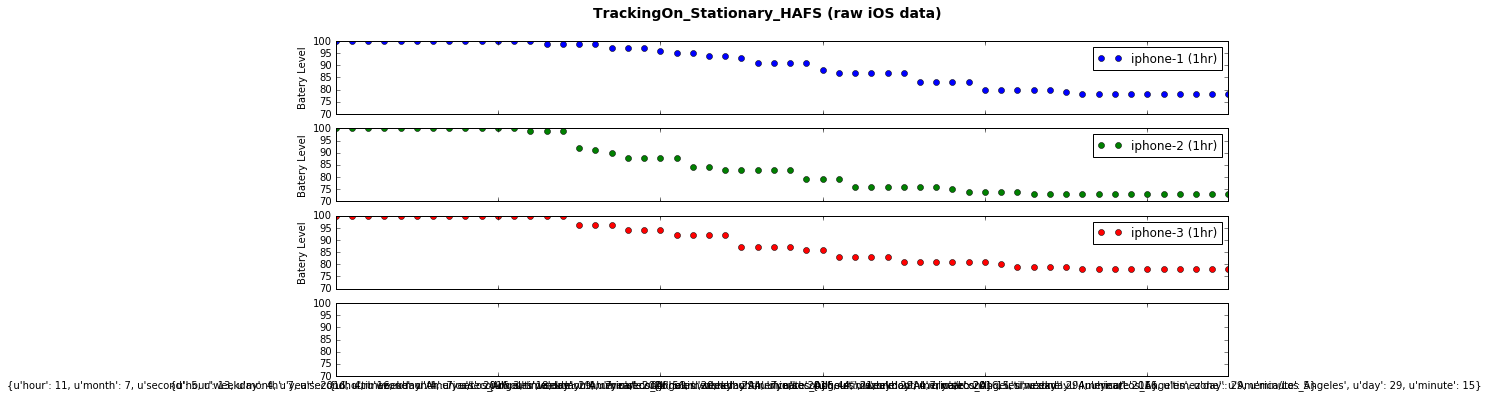

In [44]:
#iOS: No interplation on battery data
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw iOS data)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='local_dt', y='battery_level_pct', style=style[i], ax=aaxes[i], label="iphone-%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 2.0))
    
#afig.savefig('scatter_Apr_2-3_iOS.png')

About to plot 0
<type 'str'>
2016-07-29T14:00:12.856600
About to plot 1
<type 'str'>
2016-07-29T14:00:12.856600
About to plot 2
<type 'str'>
2016-07-29T14:00:12.856600


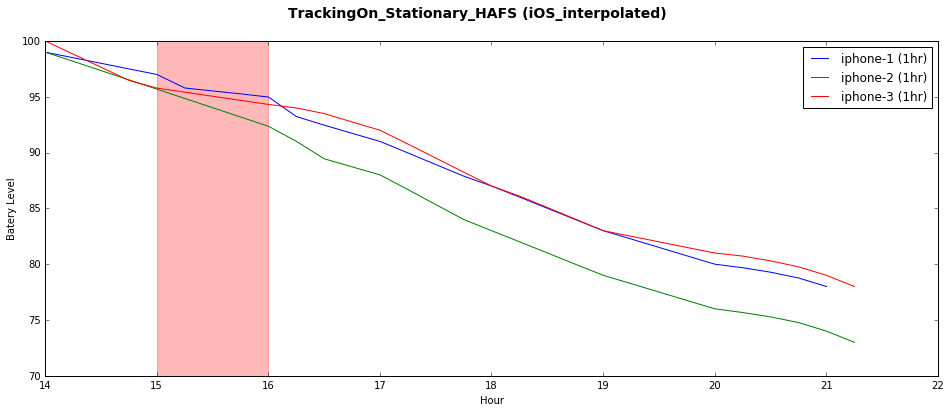

In [92]:
#iOS: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    dt_to_h = lambda x: x.hour + x.minute/60.0 + x.second/3600.0
    df['h'] = df.local_dt.map(dt_to_h)
    df.plot(x='h', y='battery_level_pct', ax=iaxes, ylim=(70, 100), label="iphone-%s (1hr)" % (i+1))
    print type(df.fmt_time[0])
    print df.fmt_time[0]

    iaxes.set_xlabel('Hour')
    iaxes.set_ylabel('Batery Level')

    dt1 = pydt.datetime(2016, 7, 29, 15, 0)
    dt2 = pydt.datetime(2016, 7, 29, 16, 0) 
    h1 = dt_to_h(dt1)
    h2 = dt_to_h(dt2)
    iaxes.axvspan(h1, h2, alpha=0.1, color='red')
    #plt.xticks(np.arange(0, max(df['hr']), 2.0))
    
#ifig.savefig('interp_Apr_2-3_iOS.png') 

About to plot 0
About to plot 1
About to plot 2
About to plot 0
About to plot 1
About to plot 2


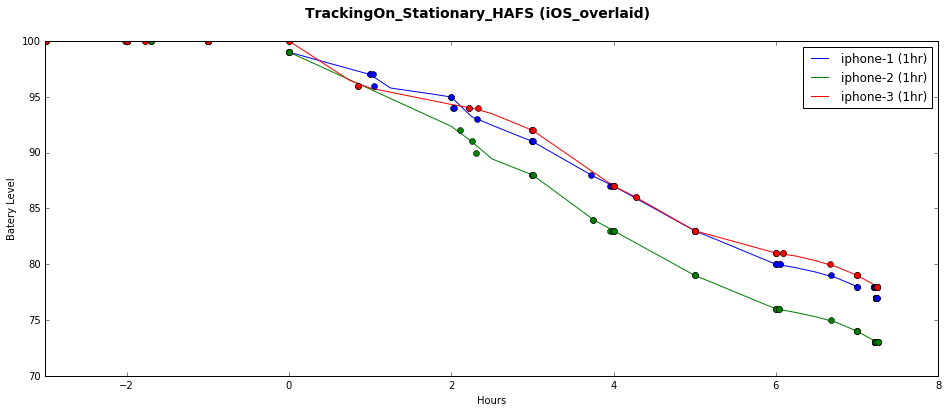

In [56]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, label="iphone-%s (1hr)" % (i+1), legend=True)

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    #plt.xticks(np.arange(0, 8, 1))

    
#ifig.savefig('overlaid_Apr_2-3_iOS.png')  

[[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]


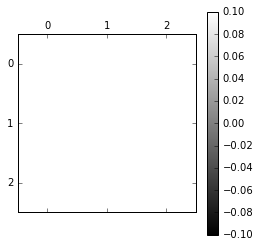

In [32]:
#iOS
#correlation analysis 
#generate list of iphone battery series 
iphone_battery_series_list = map(lambda b: b.battery_level_pct, iphone_battery_interp_df_list)
print np.corrcoef(iphone_battery_series_list)
plt.matshow(np.corrcoef(iphone_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

4
About to plot 0
About to plot 1
About to plot 2
About to plot 3


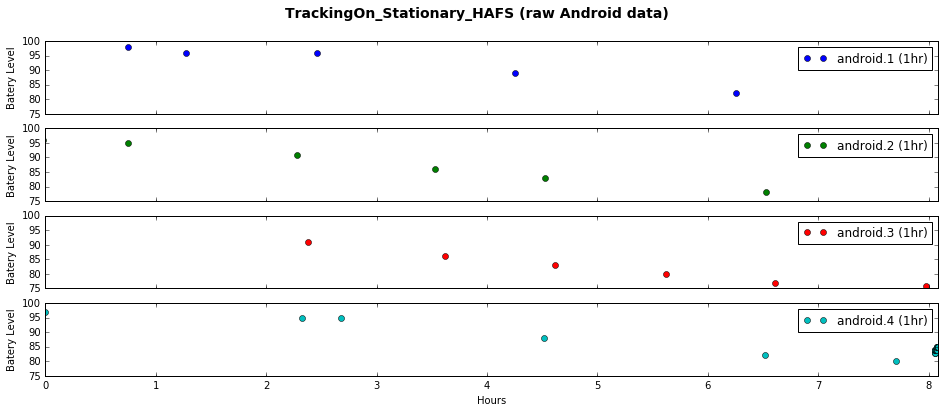

In [33]:
#Android: No interplation on battery data 
print len(android_battery_df_list)
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw Android data)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df['dt'] = df.ts.apply(ts_to_dt)
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="android.%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 1))
    
#afig.savefig('scatter_Apr_2-3_Android.png')

About to plot 0
About to plot 1
About to plot 2
About to plot 3


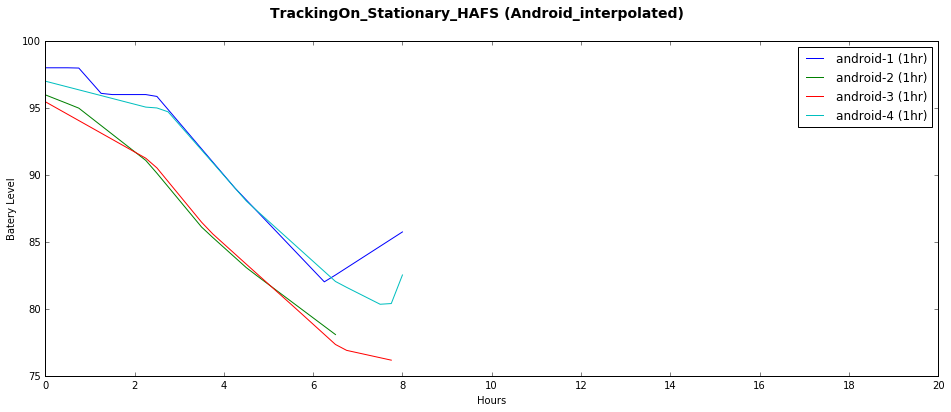

In [34]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, 20), label="android-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, 22, 2))
    
#ifig.savefig('interp_Apr_2-3_Android.png')    

About to plot 0
About to plot 1
About to plot 2
About to plot 3
About to plot 0
About to plot 1
About to plot 2
About to plot 3


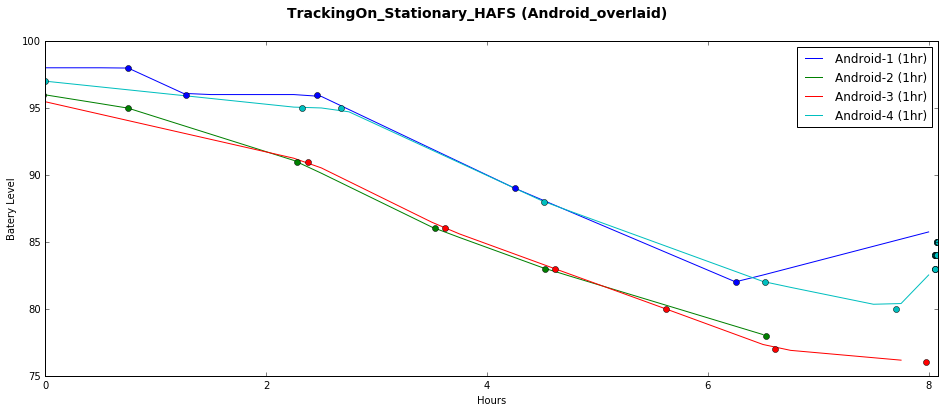

In [35]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="Android-%s (1hr)" % (i+1), legend=True)


for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, max(df.hr)), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df['hr'])+1, 2))
    #plt.xticks(np.arange(min(df.dt), max(df.dt), 1))
    
#ifig.savefig('overlaid_Apr_2-3_Android.png') 

[[ 1.               nan        nan  0.9736971]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [ 0.9736971        nan        nan  1.       ]]


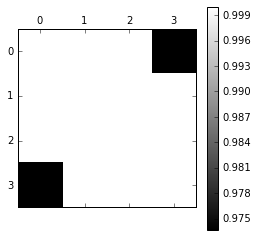

In [36]:
#Android 
#correlation analysis(tracking_off+stationary)
#generate list of android battery series 
android_battery_series_list = map(lambda b: b.battery_level_pct, android_battery_interp_df_list)
print np.corrcoef(android_battery_series_list)
plt.matshow(np.corrcoef(android_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

In [37]:
l = [1,2]
len(l)

2

In [38]:
l.append(3)
l
len(l)

3

In [105]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

iphone_time_range = estt.TimeQuery("metadata.write_ts", iphone_start_ts, iphone_end_ts)
android_time_range = estt.TimeQuery("metadata.write_ts", android_start_ts, android_end_ts)

iphone_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", iphone_time_range), iphone_ts)
android_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", android_time_range), android_ts)

<class 'pandas.core.series.Series'>
[  1  -6  -8 -16 -26 -28]
5
5
   delta_b   delta_t     slope            ts                fmt_time   b
1       -6  1.807827 -3.318902  1.469131e+09 2016-07-21 13:00:23.621  94
2       -8  1.945834 -4.111348  1.469138e+09 2016-07-21 14:57:08.623  86
3      -16  4.061190 -3.939732  1.469153e+09 2016-07-21 19:00:48.908  70
4      -26  5.997490 -4.335147  1.469174e+09 2016-07-22 01:00:39.872  44
5      -28  6.103735 -4.587355  1.469196e+09 2016-07-22 07:06:53.318  16


/Users/yawen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


count    5.000000
mean    -4.058497
std      0.479616
min     -4.587355
25%     -4.335147
50%     -4.111348
75%     -3.939732
max     -3.318902
Name: slope, dtype: float64

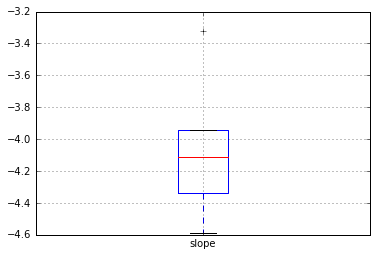

In [109]:
import numpy as np
itest = android_battery_df_discharge_list[0]
#print itest.battery_level_pct
print type(itest.battery_level_pct) #<class 'pandas.core.series.Series'>
b = itest.battery_level_pct
delta_b = np.diff(itest.battery_level_pct)
delta_b = np.insert(delta_b, 0, 1)
#print delta_b
ts = itest.metadata_write_ts

rate_df = pd.DataFrame({'delta_b':delta_b, 'ts':ts, 'b':b})
rate_df = rate_df[rate_df.delta_b!=0]
print delta_b
delta_b = rate_df.delta_b[1:]
delta_t = np.diff(rate_df.ts)/3600 #convert from seconds to hrs 
print len(delta_b)
print len(delta_t)
slope_df = pd.DataFrame({'delta_b':delta_b, 'delta_t':delta_t})
slope_df['slope'] = delta_b/delta_t
slope_df['ts'] = rate_df.ts[1:]
slope_df['fmt_time'] = slope_df.ts.apply(ts_to_dt)
slope_df['b'] = rate_df.b[1:]

#remove outliners 
slope_df = slope_df[slope_df.slope>-10 ]
slope_df = slope_df[slope_df.slope<-2 ]

print slope_df

#_, breaks=np.histogram(df.MAT,bins=1)
#(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
#iaxes = iaxes2d
ax = slope_df.boxplot(column='slope')
slope_df.slope.describe()